In [42]:
## Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [45]:
## Load Data
dfa1 = pd.read_csv("east.csv")

In [46]:
dfa2 = pd.read_csv("north.csv")

In [47]:
dfa3 = pd.read_csv("south.csv")

In [48]:
dfa = pd.concat([dfa1, dfa2, dfa3])

In [49]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578676 entries, 0 to 193340
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  578676 non-null  int64  
 1   证件号         578676 non-null  object 
 2   姓名          578676 non-null  object 
 3   单位          547123 non-null  object 
 4   借书日期        578676 non-null  object 
 5   （应）还书日期     578676 non-null  object 
 6   财产号         578676 non-null  object 
 7   书刊条码号       578676 non-null  int64  
 8   题名          578649 non-null  object 
 9   作者          577765 non-null  object 
 10  出版社         578279 non-null  object 
 11  价格          578676 non-null  float64
 12  索书号         578676 non-null  object 
 13  馆藏地         578676 non-null  object 
 14  借书经手人       578676 non-null  object 
 15  借书地         578676 non-null  object 
 16  借阅规则        577786 non-null  float64
 17  借阅方式        575471 non-null  object 
dtypes: float64(2), int64(2), object(14)
memory u

In [50]:
dfa.columns =['Unnamed: 0','license number', 'full name' , 'department' ,'borrow_date' ,'return_date','property number(of the book)',
              'book barcode number', 'title','author','publisher','price','index number','collection place','agent(librarian)','library','borrow rules','borrow mode']

In [51]:
dfa.head(5)

,Unnamed: 0,license number,full name,department,borrow_date,return_date,property number(of the book),book barcode number,title,author,publisher,price,index number,collection place,agent(librarian),library,borrow rules,borrow mode
0,0,20122601020121,秦红燕,英护12.1,2013-01-0208:10:31,2013-01-1010:45:49,763079,20763079,挑战四级710分.综合测试,井升华总主编,外语教学与研究出版社,11.9,H310.42/96,原东馆书库社科,LT07,原东馆书库,1.0,普通
1,1,20122601020121,秦红燕,英护12.1,2013-01-0208:10:50,2013-01-1010:47:27,932365,20932365,挑战四级710分.阅读.修订版,总主编井升华,外语教学与研究出版社,17.9,H310.42/99=2,原东馆书库社科,LT07,原东馆书库,1.0,普通
2,2,200923010323,王文静,医学09.3,2013-01-0208:16:30,2013-03-0611:26:15,699573,20699573,内科学习题集,"主编马中富, 李广然, 黄帆",军事医学科学出版社,58.0,R5-44/10,原东馆书库社科,LT29,原东馆书库,1.0,普通
3,3,200923010323,王文静,医学09.3,2013-01-0208:16:36,2013-03-0611:26:02,721994,20721994,内科学,"齐季民, 蔡立华, 殷思纯主编",第二军医大学出版社,37.0,R5/75,原东馆书库社科,LT29,原东馆书库,1.0,普通
4,4,20110101,金豫杰,图书馆,2013-01-0208:19:56,2013-03-1707:42:37,857531,20857531,新四军往事:记忆中的新四军抗战历程,主编施昌旺,济南出版社,35.0,I251/286,原东馆书库社科,LT07,原东馆书库,2.0,普通


In [52]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578676 entries, 0 to 193340
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    578676 non-null  int64  
 1   license number                578676 non-null  object 
 2   full name                     578676 non-null  object 
 3   department                    547123 non-null  object 
 4   borrow_date                   578676 non-null  object 
 5   return_date                   578676 non-null  object 
 6   property number(of the book)  578676 non-null  object 
 7   book barcode number           578676 non-null  int64  
 8   title                         578649 non-null  object 
 9   author                        577765 non-null  object 
 10  publisher                     578279 non-null  object 
 11  price                         578676 non-null  float64
 12  index number                  578676 non-nul

In [53]:
# define lambda function to convert date string to datetime object
import datetime
def convert_date(date_str):
    if len(date_str) <= 12:
        date_str += '00:00:00'
    return datetime.datetime.strptime(date_str, '%Y-%m-%d%H:%M:%S')

In [54]:
# apply the lambda function to the entire column using apply()
dfa['borrow_date'] = dfa['borrow_date'].apply(convert_date)

In [55]:
# apply the lambda function to the entire column using apply()
dfa['return_date'] = dfa['return_date'].apply(convert_date)

In [56]:
def convert_to_float(s):
    try:
        return float(s)
    except ValueError:
        return 0.0

In [57]:
dfa['price'] = dfa['price'].apply(convert_to_float)

In [58]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578676 entries, 0 to 193340
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Unnamed: 0                    578676 non-null  int64         
 1   license number                578676 non-null  object        
 2   full name                     578676 non-null  object        
 3   department                    547123 non-null  object        
 4   borrow_date                   578676 non-null  datetime64[ns]
 5   return_date                   578676 non-null  datetime64[ns]
 6   property number(of the book)  578676 non-null  object        
 7   book barcode number           578676 non-null  int64         
 8   title                         578649 non-null  object        
 9   author                        577765 non-null  object        
 10  publisher                     578279 non-null  object        
 11  price        

In [59]:
# calculate difference in hours
dfa['duration'] = dfa['return_date'] - dfa['borrow_date']

In [60]:
dfa['duration'] = dfa['duration'].astype('timedelta64[h]')

In [61]:
dfa.head()

,Unnamed: 0,license number,full name,department,borrow_date,return_date,property number(of the book),book barcode number,title,author,publisher,price,index number,collection place,agent(librarian),library,borrow rules,borrow mode,duration
0,0,20122601020121,秦红燕,英护12.1,2013-01-02 08:10:31,2013-01-10 10:45:49,763079,20763079,挑战四级710分.综合测试,井升华总主编,外语教学与研究出版社,11.9,H310.42/96,原东馆书库社科,LT07,原东馆书库,1.0,普通,194.0
1,1,20122601020121,秦红燕,英护12.1,2013-01-02 08:10:50,2013-01-10 10:47:27,932365,20932365,挑战四级710分.阅读.修订版,总主编井升华,外语教学与研究出版社,17.9,H310.42/99=2,原东馆书库社科,LT07,原东馆书库,1.0,普通,194.0
2,2,200923010323,王文静,医学09.3,2013-01-02 08:16:30,2013-03-06 11:26:15,699573,20699573,内科学习题集,"主编马中富, 李广然, 黄帆",军事医学科学出版社,58.0,R5-44/10,原东馆书库社科,LT29,原东馆书库,1.0,普通,1515.0
3,3,200923010323,王文静,医学09.3,2013-01-02 08:16:36,2013-03-06 11:26:02,721994,20721994,内科学,"齐季民, 蔡立华, 殷思纯主编",第二军医大学出版社,37.0,R5/75,原东馆书库社科,LT29,原东馆书库,1.0,普通,1515.0
4,4,20110101,金豫杰,图书馆,2013-01-02 08:19:56,2013-03-17 07:42:37,857531,20857531,新四军往事:记忆中的新四军抗战历程,主编施昌旺,济南出版社,35.0,I251/286,原东馆书库社科,LT07,原东馆书库,2.0,普通,1775.0


In [62]:
dfa['duration']=dfa['duration'].astype('int64')

In [63]:
data=dfa

In [64]:
data = dfa.dropna(axis = 0, how ='any')

In [65]:
import warnings
warnings.filterwarnings("ignore")

In [66]:
## Label encoding the department

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['department'] = labelencoder.fit_transform(data['department'])

In [67]:
## Label encoding the author

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['author'] = labelencoder.fit_transform(data['author'])

In [68]:
## Label encoding the publisher

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['publisher'] = labelencoder.fit_transform(data['publisher'])

In [69]:
## Label encoding the library

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['library'] = labelencoder.fit_transform(data['library'])

In [70]:
## Label encoding the borrow rules

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['borrow rules'] = labelencoder.fit_transform(data['borrow rules'])

In [101]:
## Label encoding the borrow mode

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['collection place'] = labelencoder.fit_transform(data['collection place'])

In [102]:
## Label encoding the borrow mode

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['agent(librarian)'] = labelencoder.fit_transform(data['agent(librarian)'])

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542801 entries, 0 to 193340
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Unnamed: 0                    542801 non-null  int64         
 1   license number                542801 non-null  object        
 2   full name                     542801 non-null  object        
 3   department                    542801 non-null  int64         
 4   borrow_date                   542801 non-null  datetime64[ns]
 5   return_date                   542801 non-null  datetime64[ns]
 6   property number(of the book)  542801 non-null  object        
 7   book barcode number           542801 non-null  int64         
 8   title                         542801 non-null  object        
 9   author                        542801 non-null  int64         
 10  publisher                     542801 non-null  int64         
 11  price        

In [112]:
from sklearn.model_selection import train_test_split

data_final=data[['borrow mode','library','agent(librarian)','collection place']]

# Split the data into training and testing sets
X = data_final.drop(['collection place'], axis=1)
y = data_final['collection place']

In [113]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object and fit it to the data
scaler = StandardScaler()
scaler.fit(X)

# Transform the data using the scaler
X_norm = scaler.transform(X)

In [93]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_rs = scaler.fit_transform(X)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [117]:
from sklearn.linear_model import LinearRegression
# Train a random forest classifier
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [118]:
from sklearn.metrics import mean_squared_error
# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model using MSE
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 7.387827793496424


In [115]:
# Train a random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [116]:
# Make predictions on the test set
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8820570923259734


<AxesSubplot: >

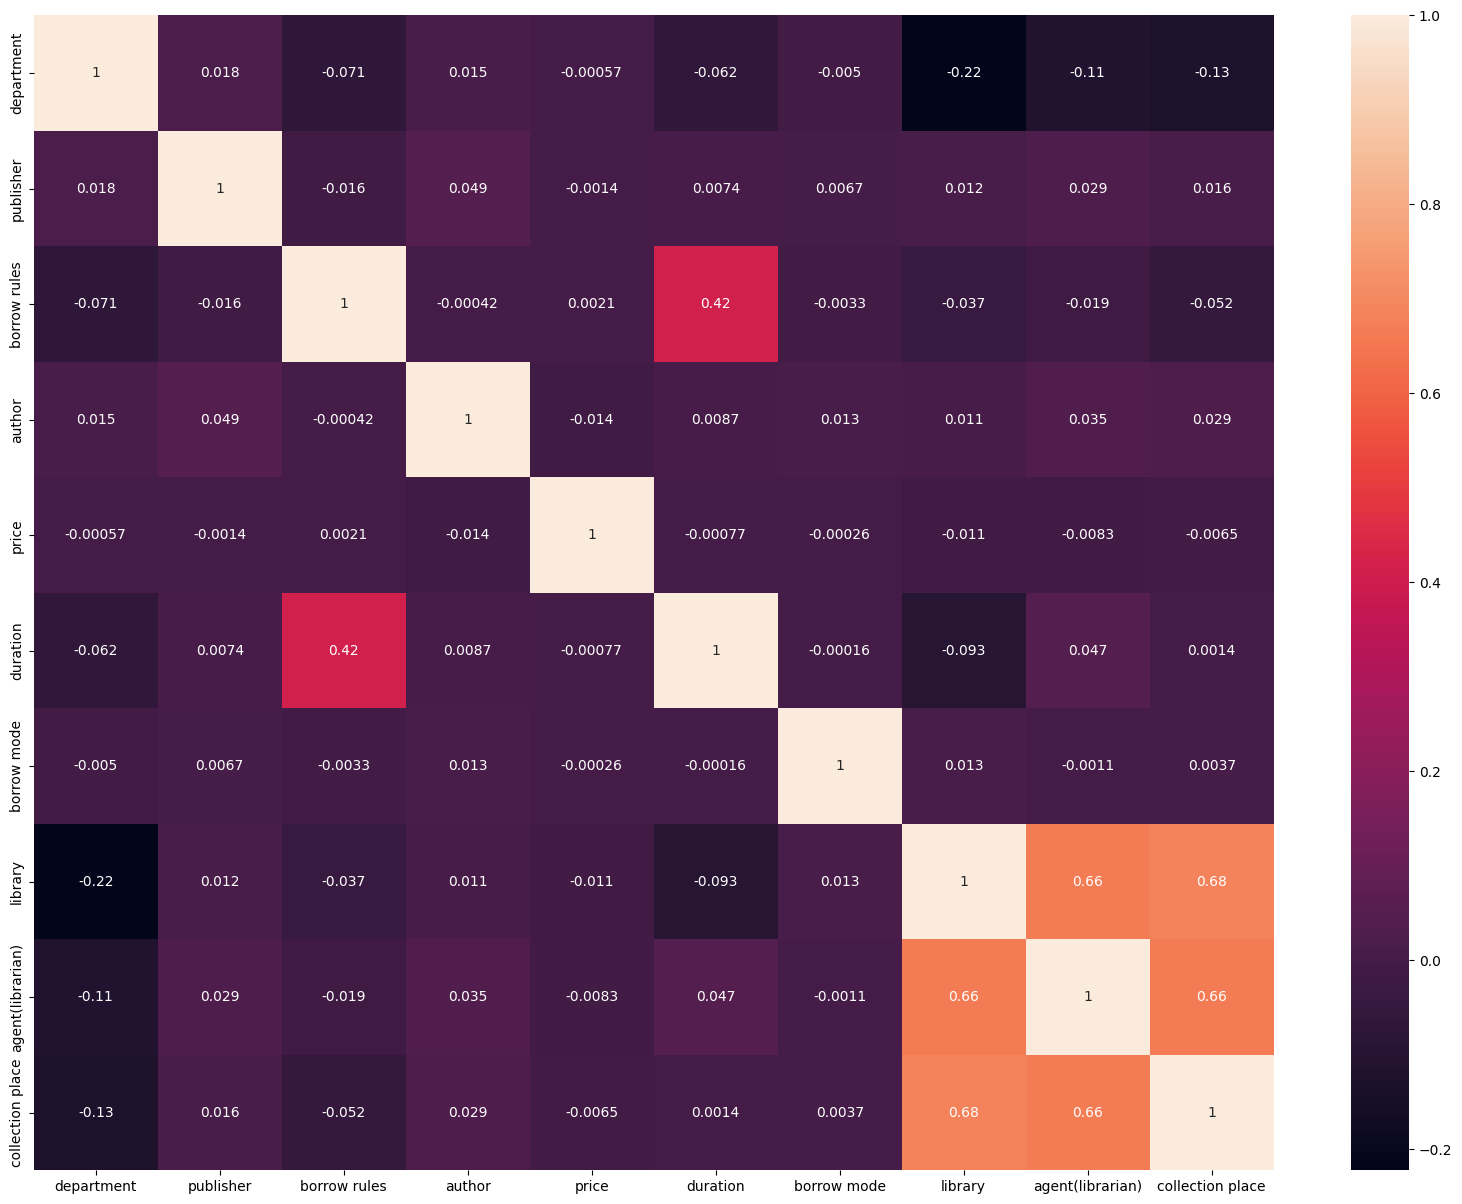

In [105]:
import seaborn as sb
corr = data_final.corr()
plt.figure(figsize=(20,15))
sb.heatmap(corr,annot=True)